<a href="https://colab.research.google.com/github/Al-Ashir-Intisar/minneMUDAC2025/blob/main/training_files/initial_model_training_multiple_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import os

In [6]:
training_data_path = input("Enter the drive path of training data: ")

Enter the drive path of training data: /content/drive/Shareddrives/minneMUDAC2025/Data/combined_complete_df.csv


In [12]:
training_df = pd.read_csv(training_data_path).drop(columns=["Little ID", "Big ID", "Match ID 18Char"])
col = training_df.pop("match_length")
training_df.insert(0, "match_length", col)
training_df.head()

,match_length,Big Days Acceptance to Match,Big Days Interview to Acceptance,Big Days Interview to Match,Big Days Approved to Match,Days Big Assesment Uploaded to Match,Big Days Contact Created to Match,Big Days Enrollment to Match,Days Match Activation to Closure Meeting Date,Days Little Acceptance to Match Activation Date,...,positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,9.0,0,0,0,0,0,0,0,273,0,...,325,7,0,333,3,24,164,10,90,261
1,46.1,0,0,0,1,0,0,0,0,0,...,2369,441,271,2316,265,340,1959,1014,1265,1377
2,6.2,0,0,0,0,0,0,0,190,0,...,73,25,5,75,9,27,47,9,36,64
3,85.6,0,0,0,9,0,0,0,0,0,...,14888,578,1501,11777,281,2126,7859,388,2959,11632
4,28.3,0,0,0,32,0,0,0,0,0,...,1279,226,62,1418,13,440,1082,139,654,1202


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
correlation_mat = training_df.corr().round(2)
print(correlation_mat)


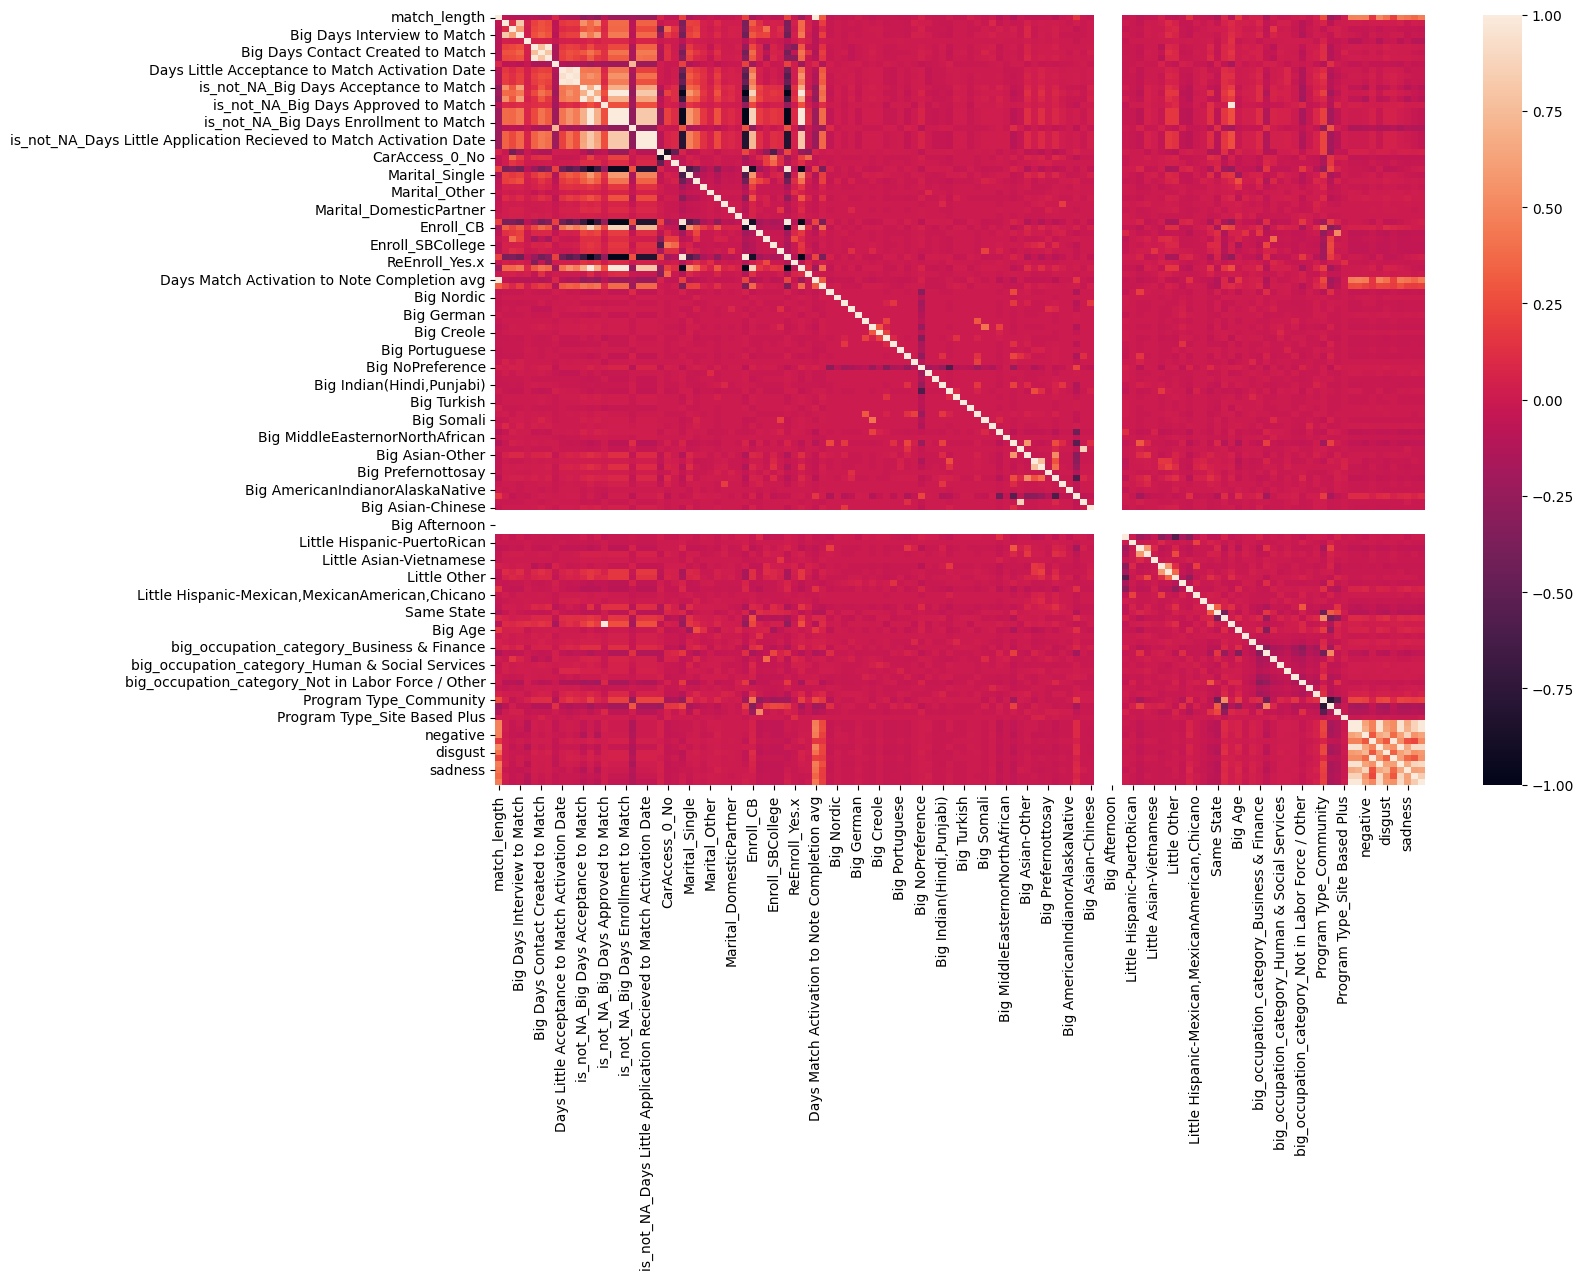

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat)
plt.show()

In [17]:
correlation_mat.index

Index(['match_length', 'Big Days Acceptance to Match',
       'Big Days Interview to Acceptance', 'Big Days Interview to Match',
       'Big Days Approved to Match', 'Days Big Assesment Uploaded to Match',
       'Big Days Contact Created to Match', 'Big Days Enrollment to Match',
       'Days Match Activation to Closure Meeting Date',
       'Days Little Acceptance to Match Activation Date',
       ...
       'positive', 'negative', 'anger', 'anticipation', 'disgust', 'fear',
       'joy', 'sadness', 'surprise', 'trust'],
      dtype='object', length=132)

In [34]:
from sklearn.linear_model import Lasso, Ridge

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(training_df.drop(columns=["match_length"]), training_df["match_length"], test_size=0.2, random_state=42)

In [37]:
lasso_model_alpha0p5 = Lasso(alpha=0.5)
lasso_model_alpha0p5.fit(x_train, y_train)

print(f"Lasso (alpha 0.5): {lasso_model_alpha0p5.coef_[:]}")

Lasso (alpha 0.5): [ 9.07554863e-05 -0.00000000e+00 -4.44223189e-05  4.15867191e-03
 -1.92537803e-03  5.03926394e-04  1.57648345e-03  2.52242108e-04
  1.58946847e-04 -2.42830142e-04  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.97708096e-02  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00

In [38]:
import numpy as np

In [39]:
coefficients = lasso_model_alpha0p5.coef_
non_zero_coefficients = coefficients[np.abs(coefficients) > 1e-10] # Adjust tolerance as needed
non_zero_indices = np.where(np.abs(coefficients) > 1e-10)[0]

print("Non-zero coefficients:")
for coef, index in zip(non_zero_coefficients, non_zero_indices):
  print(f"Feature {x_train.columns[index]}: {coef}")

Non-zero coefficients:
Feature Big Days Acceptance to Match: 9.075548629992335e-05
Feature Big Days Interview to Match: -4.442231888136932e-05
Feature Big Days Approved to Match: 0.004158671906095663
Feature Days Big Assesment Uploaded to Match: -0.0019253780327858172
Feature Big Days Contact Created to Match: 0.0005039263943423203
Feature Big Days Enrollment to Match: 0.0015764834543194463
Feature Days Match Activation to Closure Meeting Date: 0.000252242107977081
Feature Days Little Acceptance to Match Activation Date: 0.00015894684704158084
Feature Days Little Application Recieved to Match Activation Date: -0.000242830142190358
Feature Days Match Activation to Note Completion avg: 0.07977080957454176
Feature Big Age: 0.0006932244436291608
Feature net_sentiment: -0.0001526157855311856
Feature positive: 8.490966127517602e-07
Feature negative: 0.0015950599487190818
Feature anger: -7.082175564270236e-05
Feature anticipation: 0.0007763242535352034
Feature disgust: -0.0006568485117403794


In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the training set
y_pred_train = lasso_model_alpha0p5.predict(x_train)
y_pred_test = lasso_model_alpha0p5.predict(x_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)


print(f"Training MSE: {mse_train}")
print(f"Testin MSE: {mse_test}")
print(f"Training RMSE: {rmse_train}")
print(f"Testin RMSE: {rmse_test}")
print(f"Training R^2: {r2_train}")
print(f"Testin R^2: {r2_test}")

Training MSE: 17.31919331145332
Testin MSE: 19.048080883131195
Training RMSE: 4.161633490764572
Testin RMSE: 4.364410714303959
Training R^2: 0.9538570125103705
Testin R^2: 0.9562938845128988


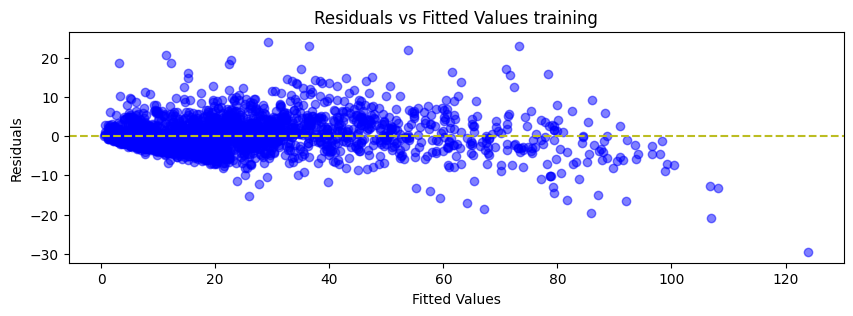

In [46]:
# Compute residuals
residuals_train = y_train - y_pred_train # Use y_train and y_pred_train

# 1. Residuals vs Fitted values plot
plt.figure(figsize=(10, 3))
plt.scatter(y_pred_train, residuals_train, color='blue', alpha=0.5) #use y_pred_train
plt.axhline(0, color='tab:olive', linestyle='--')
plt.title('Residuals vs Fitted Values training')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

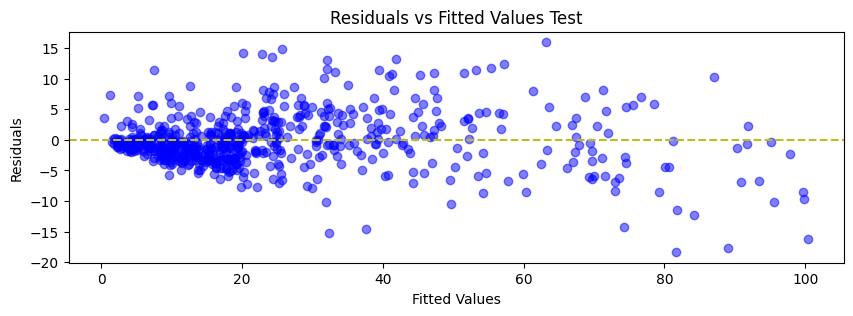

In [47]:
# Compute residuals
residuals_test = y_test - y_pred_test

# 1. Residuals vs Fitted values plot
plt.figure(figsize=(10, 3))
plt.scatter(y_pred_test, residuals_test, color='blue', alpha=0.5) #use y_pred_train
plt.axhline(0, color='tab:olive', linestyle='--')
plt.title('Residuals vs Fitted Values Test')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

<Figure size 1000x600 with 0 Axes>

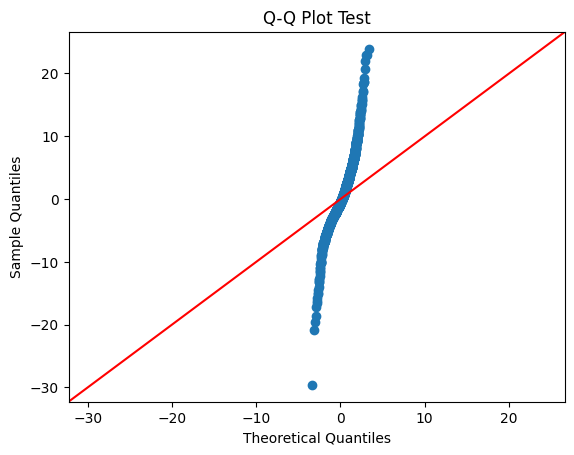

In [48]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sm.qqplot(residuals_train, line ='45')
plt.title('Q-Q Plot Test')
plt.show()

<Figure size 1000x600 with 0 Axes>

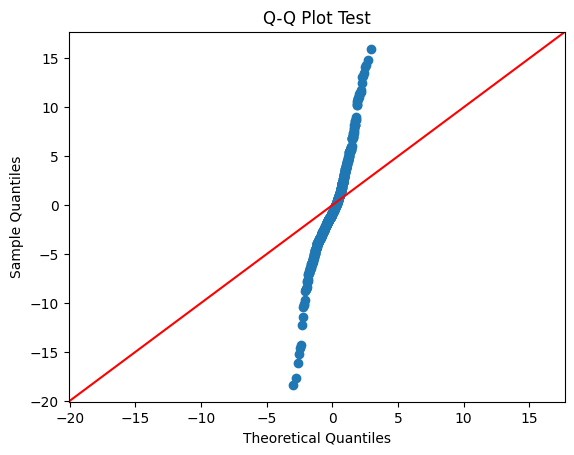

In [49]:
plt.figure(figsize=(10, 6))
sm.qqplot(residuals_test, line ='45')
plt.title('Q-Q Plot Test')
plt.show()

In [54]:
# Using gradient boosting model
from sklearn.ensemble import GradientBoostingRegressor


# Initialize the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr.fit(x_train, y_train)

# Predict
y_pred = gbr.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")


RMSE: 3.775
R²: 0.967


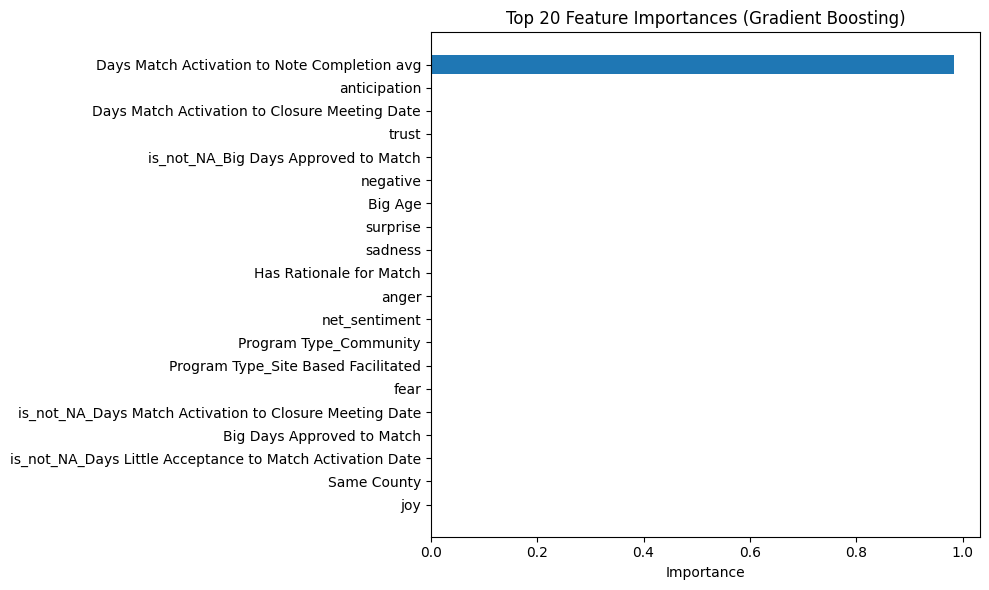

In [56]:
# Get feature importances
importances = gbr.feature_importances_
features = x_train.columns

# Create a DataFrame for easy viewing
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Keep only the top 20
top_20 = importance_df.head(20)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_20['Feature'], top_20['Importance'])
plt.gca().invert_yaxis()
plt.title("Top 20 Feature Importances (Gradient Boosting)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
